## Import

In [21]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score # metricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px

In [22]:
df = pd.read_csv('AIML Dataset.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Cleaning


In [23]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [25]:
df_for_train = pd.get_dummies(df,columns=['type'],drop_first=True)

In [26]:
duplicated = df.duplicated().sum() #checking and deleting duplicated rows
duplicated
df.drop_duplicates()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [27]:
df_nulls = df.isnull().sum()

df_nulls

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## EDA

In [28]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [29]:
df_fraud = df[df['isFraud']==1]
summary = df_fraud.groupby('isFlaggedFraud').size().reset_index(name='count')
summary['isFlaggedFraud'] = summary['isFlaggedFraud'].map({
    0:'Not flagged',
    1:'Flagged'
})

In [30]:
source = summary

alt.Chart(source).mark_bar().encode(
    x='isFlaggedFraud:N',
    y='count:Q',
    color='isFlaggedFraud:N',
    tooltip=["isFlaggedFraud", "count"]
).properties(
   title="frauds flaggeds and not flagged",
    width=700,
    height=500
)

alt.Chart(...)

C:\Users\dslig\AppData\Local\Temp\ipykernel_36904\3358046094.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()  # Remove Legend


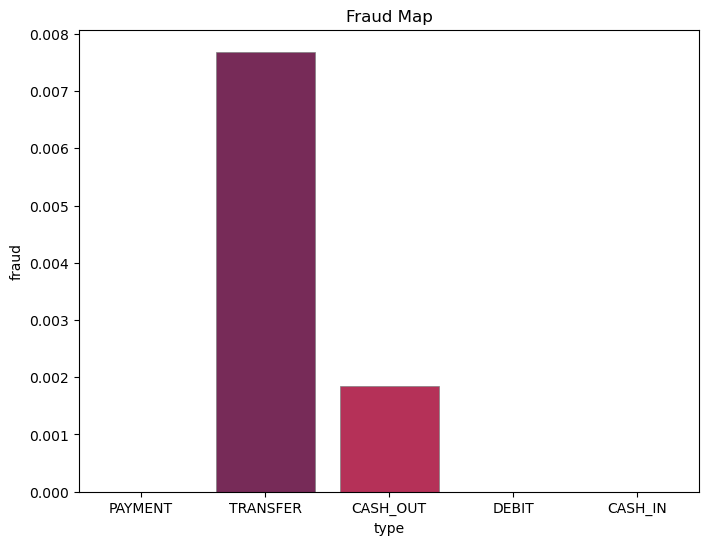

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=df,
    x='type',
    y='isFraud',
    hue='type',
    errorbar=None,
    palette="rocket",
    linewidth=.5,
    edgecolor=".5"
)
plt.xlabel("type")  
plt.ylabel("fraud")
plt.title("Fraud Map")
plt.legend().remove()  # Remove Legend
plt.show()

In [32]:
transfer_fraud = df_fraud[df_fraud["type"]== "TRANSFER"]

top_accounts = (
    transfer_fraud.groupby("nameDest")["amount"]
    .sum()
    .nlargest(10)
    .index
)

transfer_fraud = transfer_fraud[transfer_fraud["nameDest"].isin(top_accounts)]

transfer_fraud = transfer_fraud.sort_values(by=["nameDest","step"])

accounts = transfer_fraud["nameDest"].unique()
charts = []

for account in accounts:
    account_data = transfer_fraud[transfer_fraud['nameDest'] == account]

    chart = alt.Chart(account_data).mark_line(point=True).encode(
        x=alt.X("step:O", title="Time or step"),
        y=alt.Y("amount:Q", title=f"Amount sent to account {account}"),
        tooltip=[
            alt.Tooltip("amount:Q"),
            alt.Tooltip("nameDest:N")
        ]
    ).properties(
        title=f"fraudulent account {account}, transactions recieved",
        width=400,
        height=300
    )
    charts.append(chart)
n_cols = 5
rows = [alt.hconcat(*charts[i:i + n_cols]) for i in range(0,len(charts),n_cols)]
mosaic = alt.vconcat(*rows)

mosaic

alt.VConcatChart(...)

In [33]:
df_trans_grouped = df[df["type"] == "TRANSFER"].copy()

# mapped the fraud label to make it legible
df_trans_grouped["isFraud"] = df_trans_grouped["isFraud"].map({
    0: "Not Fraud",
    1: "Fraud"
})

# created a column to group by blocks of 24 steps (assuming 1 day = 24 steps)
df_trans_grouped["step_group"] = (df_trans_grouped["step"] // 24) * 24

# count the number of transactions per group
df_step_block = (
    df_trans_grouped
    .groupby(["step_group", "isFraud"])
    .size()
    .reset_index(name="count")  # ← This creates the 'count' column
)

# graph
alt.Chart(df_step_block).mark_bar(opacity=0.7).encode(
    x=alt.X("step_group:O", title="Time step (grouped every 24 steps)"),
    y=alt.Y("count:Q", title="Number of Transfers"),
    color=alt.Color("isFraud:N", title="Fraud Status"),
    tooltip=["step_group", "count", "isFraud"]
).properties(
    width=700,
    height=400,
    title="Transfers over time - Fraud vs Non-Fraud"
)

alt.Chart(...)

In [34]:
df_trans_grouped.groupby(["step_group", "isFraud"])["amount"].sum().reset_index()

,step_group,isFraud,amount
0,0,Fraud,1.048265e+08
1,0,Not Fraud,3.089925e+10
2,24,Fraud,1.832313e+08
3,24,Not Fraud,2.231912e+10
4,48,Fraud,1.750815e+08
...,...,...,...
56,672,Fraud,2.575878e+08
57,672,Not Fraud,3.528410e+09
58,696,Fraud,2.504692e+08
59,696,Not Fraud,3.938874e+08


In [35]:
## Training Model

In [36]:
df_for_train

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,True,False,False,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,True


In [37]:
df_for_train["dest_freq"] = df_for_train["nameDest"].map(df["nameDest"].value_counts())
df_for_train["orig_freq"] = df_for_train["nameOrig"].map(df["nameOrig"].value_counts())

x= df_for_train.drop(["isFraud","nameDest","nameOrig"],axis=1)

y = df_for_train["isFraud"]

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=42)
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (5090096, 13), Test set shape: (1272524, 13)


Accuracy: 0.999704524236871
Precision: 0.9844236760124611
Recall: 0.7802469135802469
F1 Score: 0.8705234159779615
ROC AUC: 0.9942391591990551


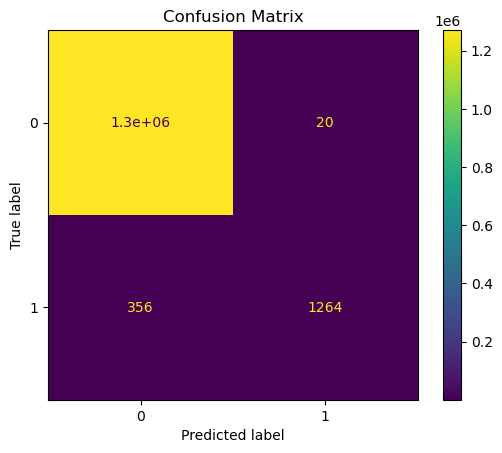

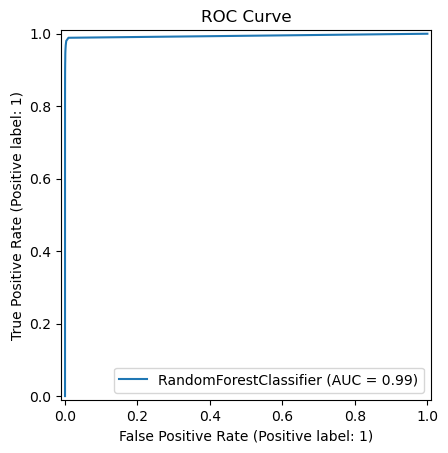

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()